In [1]:
# 1.导入库和模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

In [2]:
# 2.实例化数据集，探索数据

#下载数据
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.data.shape) #(1348, 2914)
#行是样本
#列是样本相关的所有特征

print(faces.images.shape) #(1348, 62, 47)
#1348:矩阵中图像的个数
#62:每个图像特征矩阵的行
#47:每个图像特征矩阵的列

X = faces.data

(1348, 2914)
(1348, 62, 47)


In [3]:
# 3.建模降维，获取降维后的特征矩阵
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

In [4]:
# 4.将降维后矩阵用inverse_transform返回原空间
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

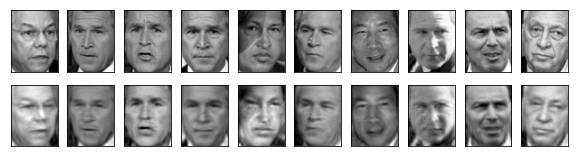

In [5]:
# 5.将特征矩阵X和X_inverse可视化
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                     ,subplot_kw={"xticks":[],"yticks":[]}
                     )

#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")